<a href="https://colab.research.google.com/github/setyo-dwi-pratama/data-analyst/blob/master/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv('https://raw.githubusercontent.com/setyo-dwi-pratama/data-analyst/master/netflix_titles.csv')

In [69]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [71]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

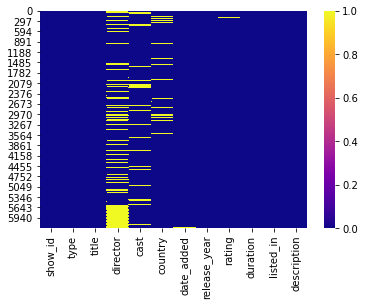

In [72]:
sns.heatmap(df.isnull(), cmap="plasma")

In [73]:
df.drop(['director','cast','date_added'], axis=1, inplace=True)

In [74]:
df['country'].replace(np.nan, 'United States', inplace=True)

In [78]:
df['rating'].replace(np.nan, 'TV-MA', inplace=True)

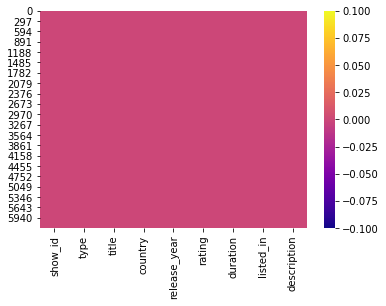

In [79]:
sns.heatmap(df.isnull(), cmap="plasma")

In [83]:
df['type'].value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

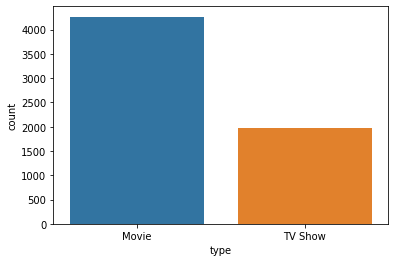

In [84]:
sns.countplot(x='type', data=df)

In [35]:
df.rating.value_counts().unique()

array([2027, 1698,  701,  508,  286,  218,  184,  169,  149,  143,   95,
         37,    7,    2])

In [36]:
df.rating.value_counts()

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

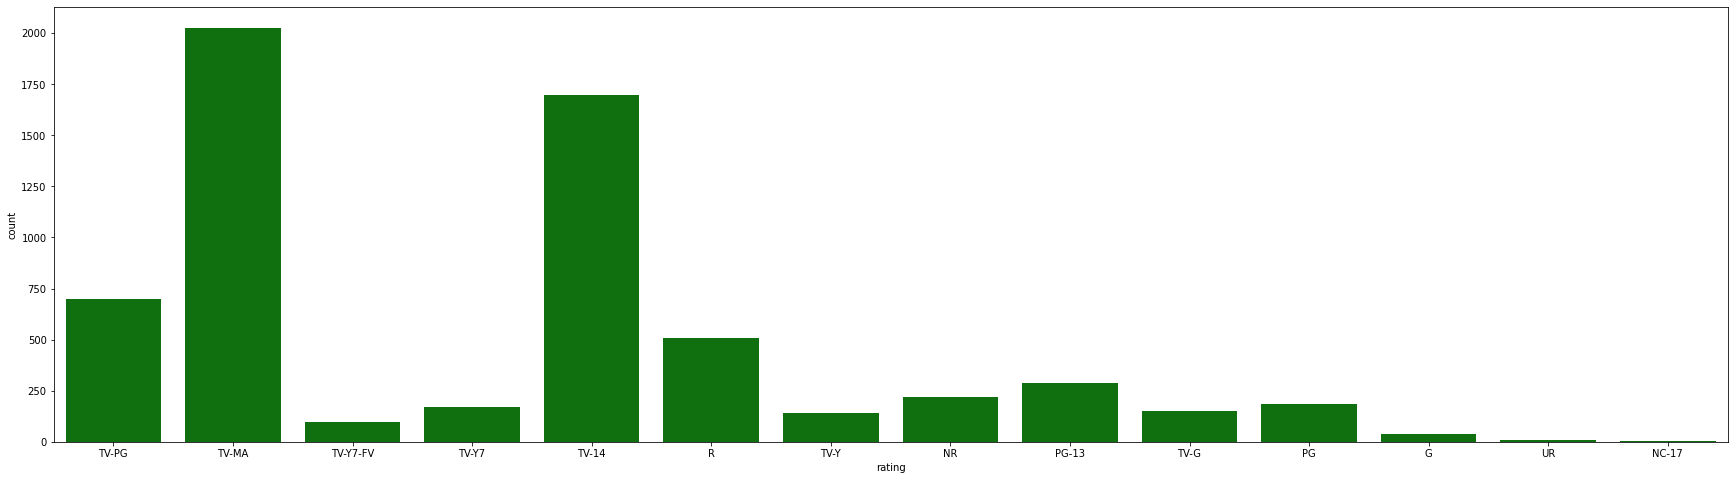

In [60]:
plt.figure(figsize=(30,8))
sns.countplot(x='rating', data=df, color="green")

In [37]:
df.release_year.value_counts()

2018    1063
2017     959
2019     843
2016     830
2015     517
        ... 
1959       1
1963       1
1964       1
1956       1
1925       1
Name: release_year, Length: 72, dtype: int64

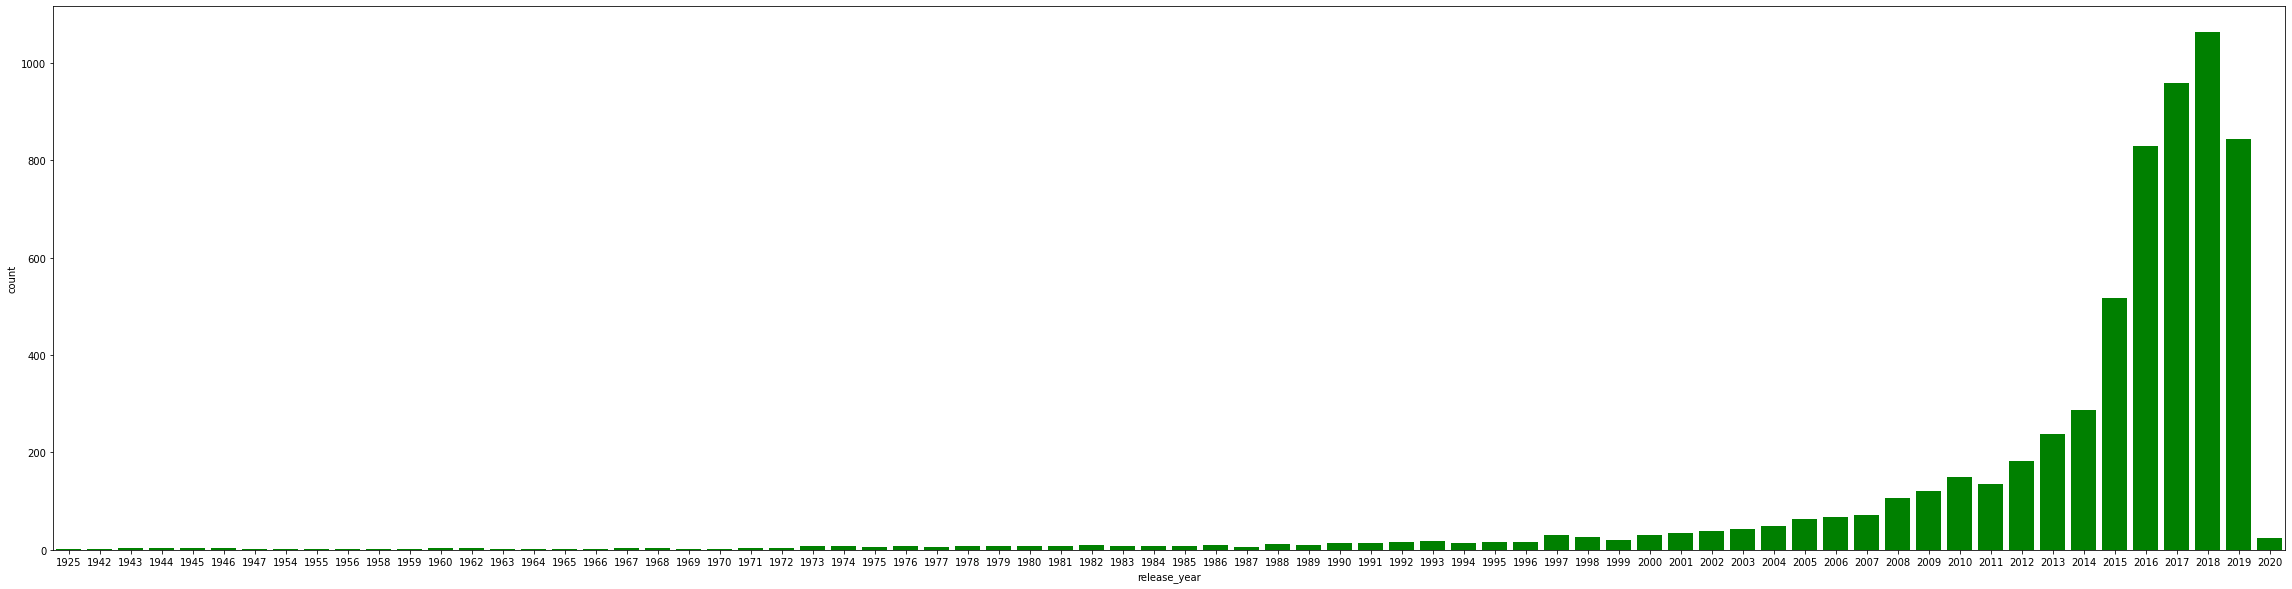

In [52]:
plt.figure(figsize=(40,10))
sns.countplot(x='release_year', data=df, saturation=1, color="green")

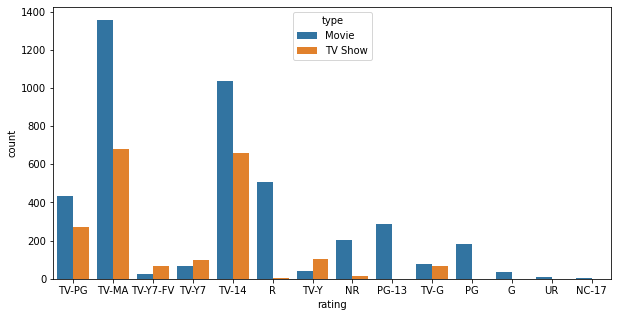

In [89]:
plt.figure(figsize=(10,5))
sns.countplot(x='rating', data=df, hue='type')

In [92]:
tahun_tua = df.sort_values("release_year", ascending=True, ignore_index=True)

In [93]:
tahun_tua

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,81030762,TV Show,Pioneers: First Women Filmmakers*,United States,1925,TV-PG,1 Season,TV Shows,This collection restores films from women who ...
1,60027945,Movie,Prelude to War,United States,1942,TV-PG,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
2,60027942,Movie,The Battle of Midway,United States,1942,TV-G,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
3,80119186,Movie,Undercover: How to Operate Behind Enemy Lines,United States,1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
4,70013050,Movie,Why We Fight: The Battle of Russia,United States,1943,TV-14,82 min,Documentaries,This installment of Frank Capra's acclaimed do...
...,...,...,...,...,...,...,...,...,...
6229,81039393,TV Show,Cheer,United States,2020,TV-MA,1 Season,"Docuseries, Reality TV, Teen TV Shows",This gripping docuseries follows the ups and d...
6230,81214114,Movie,Bulletproof 2,United States,2020,TV-MA,97 min,"Action & Adventure, Comedies",A special agent abruptly reunites with a crimi...
6231,81034946,TV Show,Maradona in Mexico,"Argentina, United States, Mexico",2020,TV-MA,1 Season,"Docuseries, Spanish-Language TV Shows","In this docuseries, soccer great Diego Maradon..."
6232,81062828,TV Show,Killer Inside: The Mind of Aaron Hernandez,United States,2020,TV-MA,1 Season,"Crime TV Shows, Docuseries","Via interviews with friends, players and insid..."


In [94]:
tahun_tua[['title','release_year']][:15]

,title,release_year
0,Pioneers: First Women Filmmakers*,1925
1,Prelude to War,1942
2,The Battle of Midway,1942
3,Undercover: How to Operate Behind Enemy Lines,1943
4,Why We Fight: The Battle of Russia,1943
5,WWII: Report from the Aleutians,1943
6,The Memphis Belle: A Story of a\nFlying Fortress,1944
7,The Negro Soldier,1944
8,Tunisian Victory,1944
9,San Pietro,1945


In [102]:
tahun_baru = df.sort_values("release_year", ascending=False, ignore_index=True)

In [104]:
tahun_baru[['title','release_year']][:15]

,title,release_year
0,Medical Police,2020
1,All the Freckles in the World,2020
2,Dracula,2020
3,Leslie Jones: Time Machine,2020
4,The Healing Powers of Dude,2020
5,"Live Twice, Love Once",2020
6,Cheer,2020
7,AJ and the Queen,2020
8,Bulletproof 2,2020
9,Jamtara - Sabka Number Ayega,2020


In [105]:
tanggal_keluar = pd.DataFrame(df['release_year'].value_counts().reset_index().values, columns=["year","Count"])

In [108]:
tanggal_keluar.sort_values('year')

,year,Count
71,1925,1
60,1942,2
53,1943,3
57,1944,3
51,1945,3
...,...,...
3,2016,830
1,2017,959
0,2018,1063
2,2019,843


Text(0.5, 1.0, 'Frequency of Movies which were released in different years and are available on Netflix')

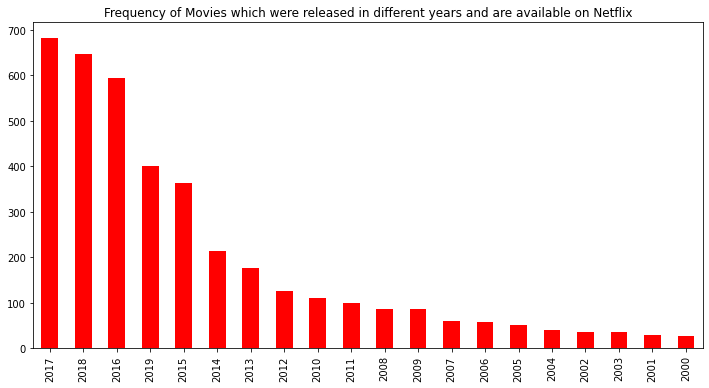

In [110]:
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["release_year"].value_counts()[:20].plot(kind="bar",color="Red")
plt.title("Frequency of Movies which were released in different years and are available on Netflix")

Text(0.5, 1.0, 'Frequency of TV shows which were released in different years and are available on Netflix')

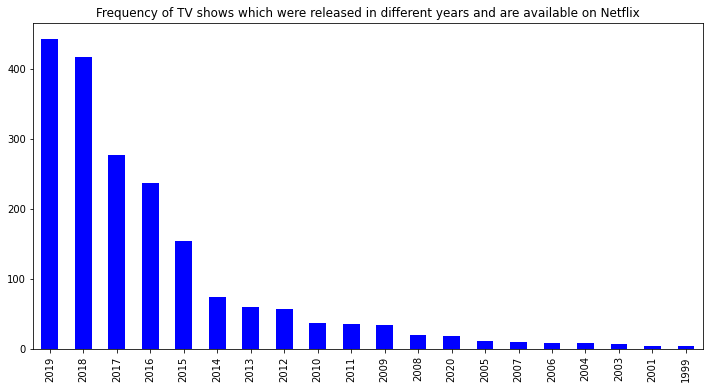

In [111]:
plt.figure(figsize=(12,6))
df[df["type"]=="TV Show"]["release_year"].value_counts()[:20].plot(kind="bar",color="Blue")
plt.title("Frequency of TV shows which were released in different years and are available on Netflix")

Text(0.5, 1.0, 'Top 10 Genres of Movies')

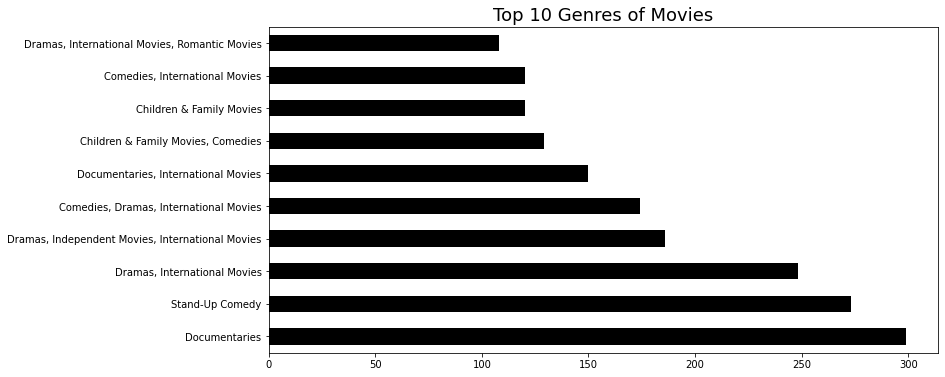

In [112]:
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh",color="black")
plt.title("Top 10 Genres of Movies",size=18)

Text(0.5, 1.0, 'Top 10 Genres of TV Shows')

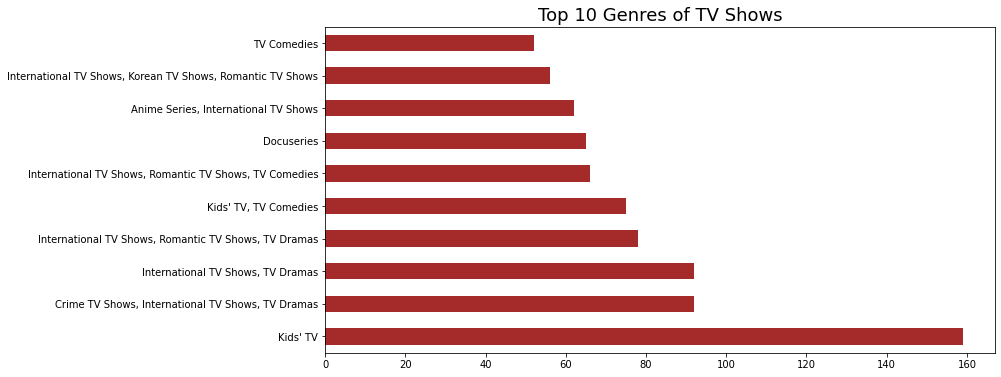

In [113]:
plt.figure(figsize=(12,6))
df[df["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh",color="brown")
plt.title("Top 10 Genres of TV Shows",size=18)